In [135]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [136]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from math import log
from CIoTS import *

In [137]:
dimensions = 3
max_p = 6
incoming_edges = 3

In [138]:
generator = CausalTSGenerator(dimensions=dimensions, max_p=max_p, data_length=10000, incoming_edges=incoming_edges)
ts = generator.generate()

In [139]:
_, graphs, times, bics = pc_incremental(partial_corr_test, ts, 0.05, 10, verbose=True)

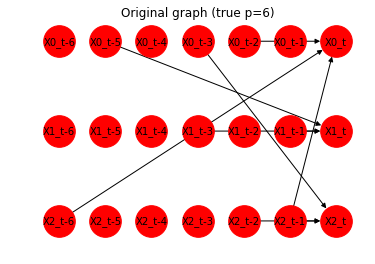

In [140]:
plt.title('Original graph (true p=6)')
generator.draw_graph()

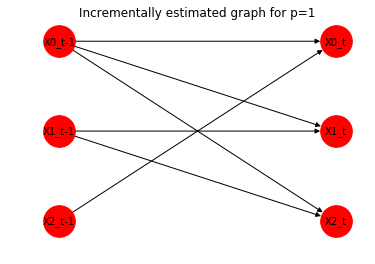

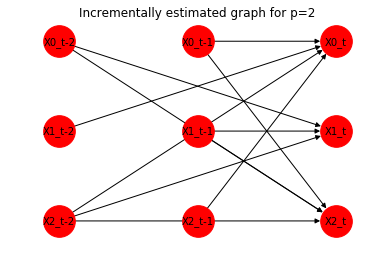

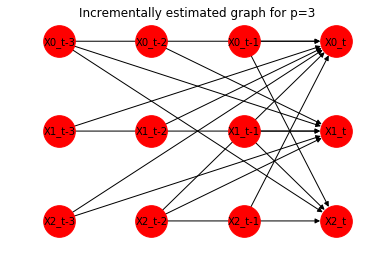

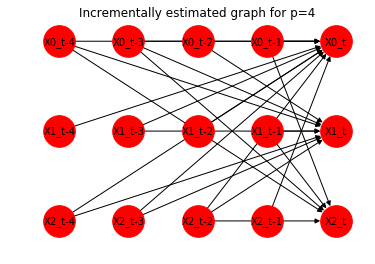

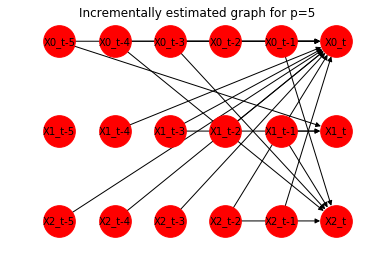

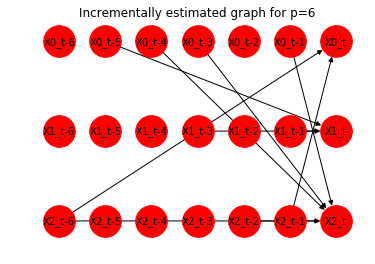

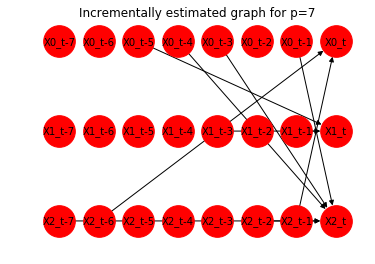

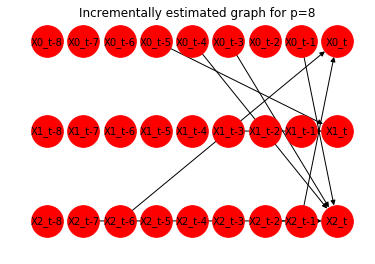

In [141]:
for p, g in graphs.items():   
    plt.title("Incrementally estimated graph for p="+str(p))
    draw_graph(g, dimensions, p)

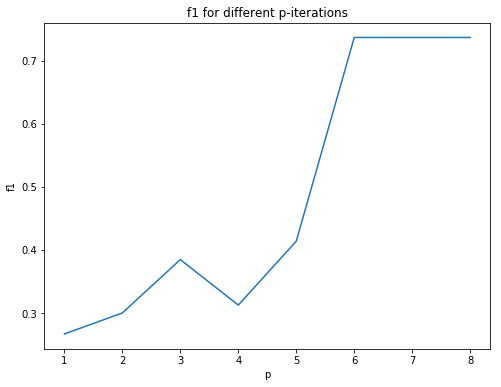

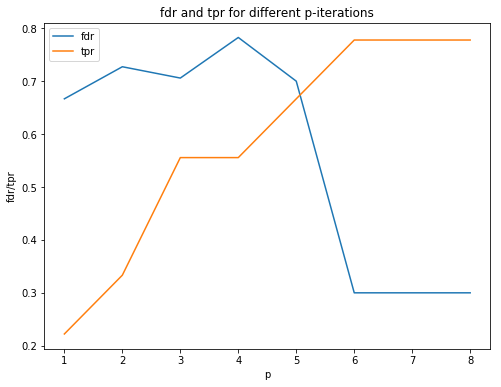

In [142]:
ps = []
f1 = []
fdr = []
tpr = []
for p, g in graphs.items():
    ps.append(p)
    f1.append(evaluate_edges(generator.graph, g)['f1-score'])
    fdr.append(evaluate_edges(generator.graph, g)['FDR'])
    tpr.append(evaluate_edges(generator.graph, g)['TPR'])

plt.figure(figsize=(8,6))
plt.title('f1 for different p-iterations')
plt.xlabel('p')
plt.ylabel('f1')
plt.plot(ps, f1)
plt.show()

plt.figure(figsize=(8,6))
plt.title('fdr and tpr for different p-iterations')
plt.xlabel('p')
plt.ylabel('fdr/tpr')
plt.plot(ps, fdr, label='fdr')
plt.plot(ps, tpr, label='tpr')
plt.legend()
plt.show()

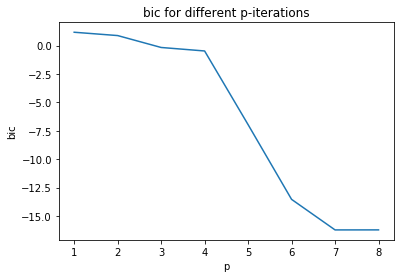

In [143]:
plt.title('bic for different p-iterations')
plt.xlabel('p')
plt.ylabel('bic')
plt.plot(list(bics.keys()), list(bics.values()))
plt.show()

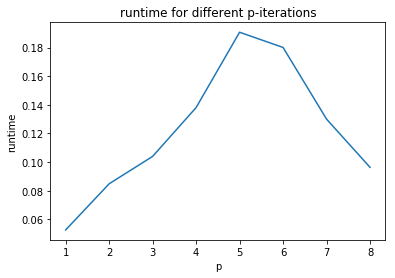

In [144]:
plt.title('runtime for different p-iterations')
plt.xlabel('p')
plt.ylabel('runtime')
plt.plot(list(times.keys()), list(times.values()))
plt.show()

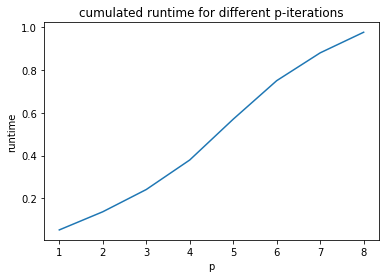

In [145]:
plt.title('cumulated runtime for different p-iterations')
plt.xlabel('p')
plt.ylabel('runtime')
plt.plot(list(times.keys()), np.cumsum(list(times.values())))
plt.show()

1.1658753706357463
27
0.8659281190916115
32
-0.19120284381215602
38
-0.5070952523967287
44
-6.991119445044625
41
-13.580925876280453
31
-16.266563165241486
34
-16.266270037171672
37


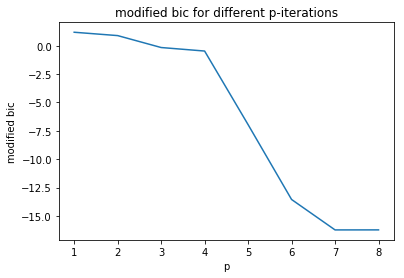

{1: 1.1907455066401815, 2: 0.8954064638868858, 3: -0.15619418797292894, 4: -0.46655529913082106, 5: -6.953340210414878, 6: -13.552358541284553, 7: -16.235228454512647, 8: -16.23216745691579}


In [146]:
modified_bic = {}
for p, g in graphs.items():
    model = VAR(p)
    mapping, matrix = transform_ts(ts, p)
    model.fit_from_graph(3, matrix, g, mapping)
    free_params = len(g.nodes())+len(g.edges())
    print(model._log_likelihood())
    print(free_params)
    modified_bic[p] = model.information_criterion('bic', free_params=free_params)
plt.title('modified bic for different p-iterations')
plt.ylabel('modified bic')
plt.xlabel('p')
plt.plot(list(modified_bic.keys()), list(modified_bic.values()))
plt.show()
print(modified_bic)

1.1658753706357463
27
0.8659281190916115
32
-0.19120284381215602
38
-0.5070952523967287
44
-6.991119445044625
41
-13.580925876280453
31
-16.266563165241486
34
-16.266270037171672
37


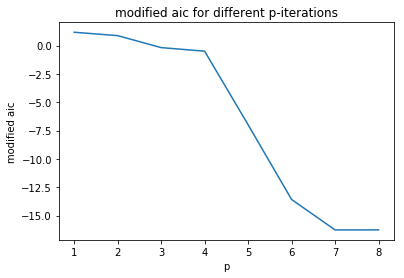

{1: 1.1712759106897517, 2: 0.8723293993476627, 3: -0.18360056312795076, 4: -0.49829173098816526, 5: -6.982915342993599, 6: -13.574722154047112, 7: -16.259758401907153, 8: -16.25886411243188}


In [147]:
modified_bic = {}
for p, g in graphs.items():
    model = VAR(p)
    mapping, matrix = transform_ts(ts, p)
    model.fit_from_graph(3, matrix, g, mapping)
    free_params = len(g.nodes())+len(g.edges())
    print(model._log_likelihood())
    print(free_params)
    modified_bic[p] = model.information_criterion('aic', free_params=free_params)
plt.title('modified aic for different p-iterations')
plt.ylabel('modified aic')
plt.xlabel('p')
plt.plot(list(modified_bic.keys()), list(modified_bic.values()))
plt.show()
print(modified_bic)

1.1658753706357463
27
0.8659281190916115
32
-0.19120284381215602
38
-0.5070952523967287
44
-6.991119445044625
41
-13.580925876280453
31
-16.266563165241486
34
-16.266270037171672
37


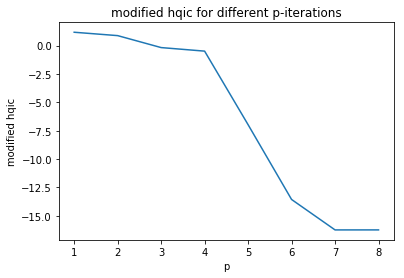

{1: 1.1778662758476488, 2: 0.880140914221749, 3: -0.17432354388280874, 4: -0.4875489402397316, 5: -6.972904102836563, 6: -13.56715198977732, 7: -16.251454884172492, 8: -16.249827107501826}


In [148]:
modified_bic = {}
for p, g in graphs.items():
    model = VAR(p)
    mapping, matrix = transform_ts(ts, p)
    model.fit_from_graph(3, matrix, g, mapping)
    free_params = len(g.nodes())+len(g.edges())
    print(model._log_likelihood())
    print(free_params)
    modified_bic[p] = model.information_criterion('hqic', free_params=free_params)
plt.title('modified hqic for different p-iterations')
plt.ylabel('modified hqic')
plt.xlabel('p')
plt.plot(list(modified_bic.keys()), list(modified_bic.values()))
plt.show()
print(modified_bic)